# 07 Gradient descent

Part of ["Introduction to Data Science" course](https://github.com/kupav/data-sc-intro) by Pavel Kuptsov, [kupav@mail.ru](mailto:kupav@mail.ru)

Recommended reading for this section:

1. Grus, J. (2019). Data Science From Scratch: First Principles with Python (Vol. Second edition). Sebastopol, CA: O’Reilly Media

The following Python modules will be required. Make sure that you have them installed.
- `matplotlib`
- `numpy`
- `scipy`

## Lesson 1

### Mean speed 

Imagine that you had a trip on an intercity train.

Each time the train passed a town you had recorded a time elapsed from the start and the travelled distance as written on the milestones. 

The results are collected in a table:

Station | Distance $s$, km | Elapsed time $t$, minutes 
---|---|---
A | 0  | 0
B | 9 | 10 
C | 21 | 21 
D | 33 | 25 
E | 46 | 37 
F | 70 | 52 

Now you want to know the speed of the train.

First of all we can compute the mean speed over the whole travel: divide the full distance $s_{AF}=70\text{ km}$ by the full time $t_{AF}=52\text{ min}$.

$$
v_{AF} = \frac{s_{AF}}{t_{AF}}
$$

$$
v_{AF} = \frac{70}{52} = 1.34 \text{ km/min}
$$

But you remember that the train changed its seed: sometimes it moved slower and sometime faster. So you want to know more details about its seed variations.

We can compute the mean speeds between each towns:

$$
v_{AB} = \frac{9}{10} = 0.90 \text{ km/min}
$$

$$
v_{BC} = \frac{21-9}{21-10} = \frac{12}{11} = 1.09 \text{ km/min}
$$

$$
v_{CD} = \frac{33-21}{25-21} = \frac{12}{4} = 3.00 \text{ km/min}
$$

$$
v_{DE} = \frac{46-33}{37-25} = \frac{13}{12} = 1.08 \text{ km/min}
$$

$$
v_{EF} = \frac{70-46}{52-37} = \frac{24}{15} = 1.60 \text{ km/min}
$$

### Augmentation of the initial data

What if you want go further and find even more information about the speed since you are definitely sure that the train moved between 
the towns with a varying speed?

Of course it requires more measurements of the elapsed time and corresponding distances.

We will model this situation using a synthetic data that are generated using so called interpolation. 

Interpolation is a mathematical procedure that allows to generate new data similar in some sense to the existing data.

The procedure of data extension due to the synthetic data is called augmentation. So in our case the augmentation is done via interpolation.

Strictly speaking our augmentation is not quite correct: the amount of the generated data will be much larger then the initial data.

But we need it just for illustration purposes only.

Just think about the interpolation as bending of an elastic rod around the pins that correspond to each town in the table above.

Below is the graph of the initial and interpolated data.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# These is the table of distances and times shown above
ss = np.array([0,9,21,33,46,70])
tt = np.array([0,10,21,25,37,52])

# Modeling new measurements using interpolation
fun_st = interp1d(tt, ss, kind='cubic')

tt_new = np.linspace(0, tt[-1], tt[-1]*10+1)  # add 10 new points between already known
ss_new = fun_st(tt_new)

fig, ax = plt.subplots()

ax.plot(tt, ss, '*', color='C1', label="original data: times and distacnes of towns");
ax.plot(tt_new, ss_new, color='C0', label="interpolation: an elastic rod bending the pins")
ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('s');

### Instant speed and derivatives

So, imagine that we have got datasets of a very frequent measurements of times and the corresponding distances, `tt_new` and `ss_new`.

We want to find the detained information about the speeds.

Consider an arbitrary time $t_0$ and find corresponding distance $s_0$. We are going to find the speed at this moment.

To be definite:

In [ ]:
t0 = 23.0  # considered time 
s0 = fun_st(t0)  # corresponding distance
print(f"t0={t0}, s0={s0}")

Consider a time interval $\Delta t$ and compute $s_1$ that corresponds to $t_1=t_0+\Delta t$. Also compute $\Delta s=s_1-s_0$.

In [ ]:
dt = 10
t1 = t0 + dt
s1 = fun_st(t1)
print(f"t1={t1}, s1={s1}, ds=s1-s0={s1-s0}")

Let us plot $s$ vs $t$ and show ($t_0$, $s_0$) and ($t_1$, $s_1$).

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(tt_new, ss_new)
ax.set_xlabel('t')
ax.set_ylabel('s');

ax.plot([t0, t1, t1], [s0, s0, s1], 'ko')
ax.plot([t0, t1], [s0, s0], 'k--')
ax.plot([t1, t1], [s0, s1], 'k--')

ax.text(t0 - 1, s0 + 3, r'($t_0$, $s_0$)', fontsize=18, ha='right')
ax.text(t1 - 1, s1 + 3, r'($t_1$, $s_1$)', fontsize=18, ha='right')
ax.text(0.5*(t0+t1), s0 - 5, r'$\Delta t$', fontsize=18, ha='center')
ax.text(t1 + 1, 0.5*(s0+s1), r'$\Delta s$', fontsize=18, va='center');

We already know how to compute the speed at $t_0$ approximately: we need to take the distance $\Delta s$ and divide it by the time interval $\Delta t$

$$
v\approx \frac{\Delta s}{\Delta t}
$$

Of course this is the mean speed at the interval between $t_0$ and $t_1$. 

Why this is only an approximate value of the speed? 

Because the curve is bended between the two marked points.

If the curve were straight between the two points the formula for $v$ above  would be exact.

How to improve the precision?

The time step $\Delta t$ must be decreased. Accordingly $\Delta s$ will also will become smaller.

The smaller $\Delta t$ the less noticeable is the bend between the points ($t_0$, $s_0$) and  ($t_1$, $s_1$).

Sometimes in practical application this is enough: we just take a sufficiently small $\Delta t$, compute the corresponding $\Delta s$ and find the speed according to the formula above.

But for the rigorous computation of the instant speed at $t_0$ we must proceed as follows:

$$
v = \lim_{\Delta t\to 0} \frac{\Delta s}{\Delta t}
$$

Here is the limit: we need to find what happen if $\Delta t$ approaches zero infinitely close. 

The result is called a derivative of $s$ at $t$. There are several notations for it:

$$
v = \frac{ds}{dt}=s'=\dot s
$$

Thus the instant speed $v$ or just speed equals to the derivative of $s$ at $t$.

### Computation of derivatives

If the functions is known, in our example this is $s(t)$, its derivative is computed according to a sufficiently simple rules. 

Actual computation of the limit is not needed.

Examples of simple rules for computing the derivatives

$$
(u+v)' = u' + v'
$$

$$
(uv)' = u' v + u v'
$$

$$
\left(\frac{u}{v}\right)'=\frac{u'v-uv'}{v^2}
$$

$$
c' = 0 \text{ (where $c$ is constant)}
$$

$$
(cu)' = cu' \text{ (where $c$ is constant)}
$$

The Chain rule. 

Let $y=f(u)$ and $u=g(x)$. Then $y(x)=f(g(x))$. Here $u$ denotes a temporary variable introduced for convenience and $x$ is the variable by which we differentiate.

$$
y'(x)=f'(u) g'(x)
$$

Derivatives of some elementary functions (differentiation at $x$ is assumed):

$$
(x^n)' = n x^{n-1}
$$

$$
x'=1
$$

$$
(\sin x)' = \cos x
$$

$$
(\cos x)' = -\sin x
$$

$$
(e^x)' = e^x
$$

$$
(\log x)' = 1/x
$$

Examples of computation of derivatives:

$$
(x^3 + 4)' = (x^3)' + 4' = 3x^2
$$

<br>

$$
(\sin x \cos x)' = (\sin x)' \cos x + \sin x (\cos x)' = \cos x \cos x - \sin x \sin x = \cos^2 x - \sin^2 x
$$

<br>

$$
\left( \frac{e^x}{x^2} \right)' = \frac{(e^x)'x^2 - e^x (x^2)'}{x^4} = \frac{e^x x^2 - e^x 2 x}{x^4} = \frac{x-2}{x^3} e^x
$$

Examples of using the chain rule:

Find $y'(x)$ for $y(x)=e^{-x^2}$. 

First denote $y=f(u)=e^u$, $u=g(x)=-x^2$

Then find the derivatives using a chain rule
$$
y'(x)=f'(u)g'(x)=(e^u)'(-x^2)'=e^u (-2x)
$$

Finally substitute $u$ with its value $-x^2$:
$$
y'(x)= -2x e^{-x^2}
$$

One more example: find $y'(x)$ for $y(x)=\sin^2 x$

Denote $y=f(u)=u^2$ (notice that square is the most outer operation in the expression $\sin^2 x$). $u=g(x)=\sin x$

Now the chain rule:

$$
y'(x)=f'(u)g'(x)=(u^2)'(\sin x)' = 2 u \cos x
$$

Substitute for $u$:

$$
y'(x) = 2 \sin x \cos x
$$

### Geometric meaning of the derivative

For a function $y(x)$ its derivative at a certain point $x_0$ equals to the slope of a tangent line (the slope means the tangent of an angle with a horizontal line).

Positive slope - the function grows at this point. 

Growing means that $y$ gets larger if we move along $x$ from left to right.

Negative slope - the function decays.

Zero slope - the point is a special point, can be minimum or maximum (also can be an inflection point).

In the example above we see a graph of 

$$
y(x) = x^2
$$

Its derivative is

$$
y'(x) = 2x
$$

Consider a point $x_0=-2.5$:

$$
y'(x=-2.5) = 2 \cdot (-2.5) = -5
$$

The derivative is negative and the function decays.

The point $x_0=4$:

$$
y'(x=4) = 2 \cdot 4 = 8
$$

The derivative is positive and the function grows.

The point $x_0=0$:

$$
y'(x=0) = 2 \cdot 0 = 0
$$

The derivative is zero - this is the maximum.

Below is an illustration of this example. 

Compare the absolute values of the slopes at $x_0=-2.5$ and $x_0=4$: closer to the maximum means  smaller slope.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fun(x):
    """Considered function"""
    return x**2

def dfun(x):
    """Derivative"""
    return 2*x

def tangent_line(px):
    """Coefficients of a tangent line y=kx+b """
    k = dfun(px)  # derivative equals to slope of the tanegt line
    b = fun(px) - k * px
    return k, b

fig, ax = plt.subplots(figsize=(10, 8))

xx = np.linspace(-5, 5, 100)
yy = [fun(x) for x in xx]
ax.plot(xx, yy)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y(x)=x^2$')

px0 = -2.5
k0, b0 = tangent_line(px0)
x0 = np.linspace(px0-1, px0+1, 25)
ax.plot([px0], [fun(px0)], 'o', color='C1')
ax.plot(x0, k0 * x0 + b0, color='C1')
ax.text(px0-0.1, fun(px0)-1.5, r'$y^\prime({{{}}})={{{}}}$'.format(px0,dfun(px0)), fontsize=18, ha='right')

px0 = 4
k0, b0 = tangent_line(px0)
x0 = np.linspace(px0-1, px0+1, 25)
ax.plot([px0], [fun(px0)], 'o', color='C1')
ax.plot(x0, k0 * x0 + b0, color='C1')
ax.text(px0-0.3, fun(px0)+0.1, r'$y^\prime({{{}}})={{{}}}$'.format(px0,dfun(px0)), fontsize=18, ha='right')

px0 = 0
k0, b0 = tangent_line(px0)
x0 = np.linspace(px0-1, px0+1, 25)
ax.plot([px0], [fun(px0)], 'o', color='C1')
ax.plot(x0, k0 * x0 + b0, color='C1');
ax.text(px0, fun(px0)+1.5, r'$y^\prime({{{}}})={{{}}}$'.format(px0,dfun(px0)), fontsize=18, ha='center');

All this together means that we can use derivatives to find functions maximums or minimums.

### Gradient descent for a one-dimensional function

Assume we have a function $y(x)$ and want to find $x_\text{min}$ where the function reaches its minimum. 

We start with an initial guess at $x_0$ and going to find a point $x_1$ somehow closer to the minimum. 

According to the discussion above the sign of a derivative indicates the direction of the step and a derivative magnitude determines its size.



For the left point:

$$
x_1 = x_0 + \Delta x_0
$$

and for the right point:

$$
x_1 = x_0 - \Delta x_0
$$

How to choose $\Delta x$ automatically? 

We can set $\Delta x = -\gamma y'(x)$, where $\gamma$ is some small parameter.

$$
x_1 = x_0 - \gamma y'(x_0)
$$

Similarly we will find $x_2$ then $x_3$ and so on. 

In general we have an iteration formula:

$$
x_{n+1} = x_n - \gamma y'(x_n)
$$

To compute the minimum we have to apply this formula to get $x_0$, $x_1$, $x_2$, $x_3$, ... until two successive $x_n$ and $x_{n+1}$ 
becomes sufficiently close to each other:

$$
|x_{n+1}-x_n| < \epsilon
$$

Here $\epsilon$ is an absolute error. This is selected before the beginning of the computations.

The iterative method of minimum finding is called gradient descent. 

Here the derivative is called gradient. We go to in the descending direction that is pointed by the gradient.

Later we will consider a general case where the gradient descent is used to find minimums of functions of many variables.

One may ask a question: why we perform this procedure of iteration if previously we said that a minimum (as well as a maximum, of course) can by computed as a zero of the derivative. 

For example, given 

$$
y=x^2
$$ 

we can find its derivative 

$$
y'=2x
$$

The minimum is where $y'=0$:

$$
2x=0, \;\; x = 0
$$

Why we need the iterations if the minimum can be found that simple?

The answer is that often a functions that has to be minimized is very complicated so that finding its minimum as $y'(x)=0$ is much more  complicated compared with the simple iteration procedure discussed above.

### Example of a gradient descent for a function of one variable

Consider an example.

A function that we minimize is as follows:

$$
y(x) = x^3 + 4 x^2 - x
$$

Its derivative can be easily found:

$$
y'(x) = 3 x^2 + 8 x -1
$$

Here is the graph of the function:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fun(x):
    """The function"""
    return x**3 + 4 * x**2 - x

def dfun(x):
    """Its derivative"""
    return 3 * x**2 + 8 * x - 1

xx = np.linspace(-4, 2, 100)
yy = [fun(x) for x in xx]
fig, ax = plt.subplots()
ax.plot(xx, yy)
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y');

Before testing the iteration procedure for minimization we can find the minimum explicitly.

Condition for the minimum is $y'(x)=0$:

$$
y'(x) = 3 x^2 + 8 x - 1=0
$$

We need to solve this quadratic equation.

$$
D = 8^2 + 4\cdot 3 \cdot 1 = 76
$$

$$
x_1 = \frac{-8 + \sqrt{76}}{6} = 0.1196329811802247
$$

$$
x_2 = \frac{-8 - \sqrt{76}}{6} = -2.786299647846891
$$

From the plot above we see that $x_2$ is the maximum and $x_1$ is the minimum that we need.

$$
x_\text{min} = x_1 = 0.1196329811802247
$$

Let us now write a program for iterative finding of this point.

For convenience here is the formula for iterations accompanied with the condition for the iterations stop:

$$
x_{n+1} = x_n - \gamma y'(x_n),\;\; |x_{n+1}-x_n| < \epsilon
$$



In [ ]:
gamma = 0.05
eps = 1e-10
x0 = -2
iters = [x0]
while True:
    x1 = x0 - gamma * dfun(x0)  # one iteration
    iters.append(x1)  # store current iteration for subsequent illustration
    if np.abs(x1-x0)<eps:  # stop if two points are close to each other
        break
    x0 = x1

xmin = x1
print(f"x_min={xmin}")

In the plot below we see how the iterations of $x_n$ converge to $x_\text{min}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(-4, 2, 100)
yy = [fun(x) for x in xx]
fig, ax = plt.subplots()
ax.plot(xx, yy)

x_iter = iters[:16]  # show only 16 points since others will overlap each other
y_iter = [fun(x) for x in x_iter]

ax.plot(x_iter, y_iter, 'o')

ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_ylim([-1,15])

for n, x in enumerate(x_iter):
    print(f"x{n}={x:8.4f}")
    
print(f"x_min={xmin:8.4f}")

Sometimes a function is so complicated that we can not find its derivative. In this case we can use its finite difference approximation

$$
y'(x) \approx \frac{y(x+\Delta x)-y(x)}{\Delta x}
$$

Let us check our iterations with the finite difference approximation of the derivative.

Here is the function for it:

In [ ]:
def ndfun(x, dx):
    """Finite difference approximation of the derivative"""
    dy = fun(x+dx) - fun(x)
    return dy / dx

In [ ]:
gamma = 0.05
eps = 1e-10
x0 = -2
dx = 0.001  # finte step for derivative computation
iters = [x0]
while True:
    x1 = x0 - gamma * ndfun(x0, dx)  # exact dfun is substituted with appoximate ndfun
    iters.append(x1)  
    if np.abs(x1-x0)<eps:
        break
    x0 = x1

xmin_nd = x1
print(f"x_min={xmin_nd}")

Notice that the iterations also converge to the $x_\text{min}$.

### Exercises

1\. For the functions $y(x)$ listed below compute the derivatives at $x$

- $y(x)=2x^2-x$
- $y(x)=\sin x^2$
- $y(x)=e^{-3x}$
- $y(x)=\log(1/x)$

2\. Write a program that finds the minimum of the function 

$$
y(x) = 1-e^{-(x-5)^2}
$$

using a gradient descent. 

## Lesson 2

### Scalar function of many variables

Let us remember that the term scalar means a single number unlike a vector which is an ordered set of numbers.

An example: function of two variables

$$
f(x,y)=\log(1+x^2+y^2)
$$

This is its implementation as Python function

In [ ]:
def fun(x, y):
    # Test function to demonstrate surface plotting
    return np.log(1 + x**2 + y**2)

And this is its graph

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Make data.
X = np.linspace(-2, 2, 101)
Y = np.linspace(-2, 2, 101)
X, Y = np.meshgrid(X, Y)
Z = fun(X, Y)

# {"projection": "3d"} activates using 3D plotting
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='copper')  # cmap specifies how the surface will be painted

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10, pad=0.07);

### Minimizing function of many variables

We want to find its minimum point, i.e., such pair $x_\text{min}$ and $y_\text{min}$ that $f(x_\text{min}, y_\text{min})$ reaches its minimum.

For this simple function we can find the minimum analytically. 

The minimum point fulfills the equation:

$$
\frac{\partial f(x,y)}{\partial x}=0, \; \frac{\partial f(x,y)}{\partial y}=0
$$

The notation with curly $\partial$ stands for a partial derivative. 

The partial derivative at $x$ means that we need to compute a usual derivative at $x$ considering $y$ as a constant. 

And similarly for the partial derivative at $y$: now $x$ must be treated as a constant.

Let us compute the partial derivatives of our function $f(x,y)=\log(1+x^2+y^2)$.

Since the chain rule will be used, we introduce a notation:

$$
u(x,y) = 1+x^2+y^2
$$

Now we have:

$$
\frac{\partial}{\partial x} \log u(x,y) = 
\left(\frac{d}{d u} \log u \right) \left( \frac{\partial}{\partial x} u(x,y) \right) =
\left(\frac{1}{u} \right) \left( \frac{\partial}{\partial x} (1+x^2+y^2) \right)=\left(\frac{1}{u} \right) (2x)
$$

And finally after substituting $u$:
$$
\frac{\partial}{\partial x} \log (1+x^2+y^2) = \frac{2x}{1+x^2+y^2}
$$

Doing in the same manner for $y$ we obtain:

$$
\frac{\partial}{\partial y} \log (1+x^2+y^2) = \frac{2y}{1+x^2+y^2}
$$

Now we need to find such $x_\text{min}$ and $y_\text{min}$ that both of these partial derivatives vanish. Obviously these are:

$$
x_\text{min} = 0, \; y_\text{min}=0
$$

This point is the minimum of our function.

### Gradient

Most of functions in practice can not be analyzed that simple. 

We either cannot solve equations for simultaneous zeros of the partial derivatives or even cannot compute the derivatives themselves.

Thus a numerical algorithm is required to find the minimum. The gradient descent works well.

Let us first define a gradient of a function. It is denoted as $\nabla f$.

Given the scalar function of many variables $f(x_1, x_2, \ldots x_n)$ its gradient is computed as a vector of its partial derivatives:

$$
\nabla f = \left(
\frac{\partial}{\partial x_1} f(x_1, x_2, \ldots x_n),
\frac{\partial}{\partial x_2} f(x_1, x_2, \ldots x_n),
\dots
\frac{\partial}{\partial x_n} f(x_1, x_2, \ldots x_n)
\right)
$$

For example for the above function of two variables the gradient components have already been computed and its gradient can be written as follows:

$$
\nabla \log(1+x^2+y^2) = \left(
\frac{2x}{1+x^2+y^2}, 
\frac{2y}{1+x^2+y^2}
\right)
$$

Why do we need a gradient?

Because this a vector that points a direction of the fastest function growth.

Imagine that you stand somewhere in mountainous area and what to climb up to the closest mountaintop.

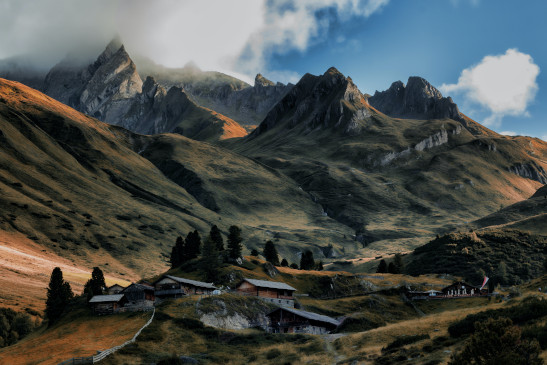

But the weather is extremely foggy so that you can not just look where to go. 

But you have a formula describing the heights of the surrounding area: 

$$
h = f(x, y)
$$

Here $x$ and $y$ are coordinates of a point and $h$ is its attitude, i.e., the height above sea level.

Thus you can do as follows:

Obtain you initial coordinates ($x_0$, $y_0$) and compute the gradient at your position:

$$
\nabla f(x=x_0,y=y_0) 
$$

This vector points where the height growth is the fastest. 

You take a small step along this direction and appears at the point ($x_1$, $y_1$). 

Do all the same again: compute the gradient and take a step.

Repeat it until reach at the top.

And if you want to go to the canyon instead you just need to takes steps opposite to the gradient direction.

### Gradient descent for a function of many variables

Assume that $v_n=(x_n, y_n)$ is a vector of coordinates $x_n$ and $y_n$. 

The algorithm of going down to the canyon can be written as a simple iterative formula:

$$
v_{n+1} = v_n - \gamma \nabla f(v_n)
$$

This is the equation for the gradient descent. The iterations stop when the distance between two successive vectors become sufficiently small:

$$
|v_{n+1}-v_{n}| < \epsilon
$$

Here $\epsilon$ is an absolute error that we accept before the iterations start. 

Compare this equation with the one considered above for one dimensional functions

$$
x_{n+1} = x_n - \gamma y'(x_n)
$$

Here we have the derivative instead the gradient. Indeed a function has only one variable its gradient is transformed into a simple derivative.

### Example of a gradient descent for a function of two variables



Let us find the minimum of the function discussed above using the gradient descent.

Let us remember the formulas for the function and its gradient:

$$
f(x,y)=\log(1+x^2+y^2)
$$

$$
\nabla f(x,y) = \left(
\frac{2x}{1+x^2+y^2}, 
\frac{2y}{1+x^2+y^2}
\right)
$$

Below the Python implementation:

In [ ]:
import numpy as np

def fun(x, y):
    # Test function to demonstrate surface plotting
    return np.log(1 + x**2 + y**2)

def grad_fun(x, y):
    denom = 1 + x**2 + y**2
    return np.array([2*x / denom, 2*y / denom])

Algorithm of the gradient descent can be implemented as follows:

In [ ]:
gamma = 0.5
eps = 1e-10
v0 = np.array([-2, 2])  # initial point
iters = [v0]
while True:
    v1 = v0 - gamma * grad_fun(v0[0], v0[1])  # one iteration
    iters.append(v1)  # store current iteration for subsequent illustration
    if np.linalg.norm(v1-v0)<eps:  # stop if to points are close to each other
        break
    v0 = v1

vmin = v1
print(f"v_min={vmin}")

Here is the graph of the function. The bullet points on it shows the steps approaching to the minimum.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Make data.
X = np.linspace(-2, 2, 101)
Y = np.linspace(-2, 2, 101)
X, Y = np.meshgrid(X, Y)
Z = fun(X, Y)

# {"projection": "3d"} activates using 3D plotting
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

# Plot the surface.
surf = ax.plot_wireframe(X, Y, Z, alpha=0.7)  # cmap specifies how the surface will be painted

xy_iter = np.array(iters[:10])
z_iter = np.array([fun(xy[0], xy[1]) for xy in xy_iter])
ax.plot(xy_iter[:, 0], xy_iter[:, 1], z_iter, 'ok');

Gradient descent works better if we can find expression for the function gradient.

But this not always possible. 

In this case we can use its final difference approximation. 

This is done in a similar manner as in one dimensional case:

In [ ]:
def ngrad_f(x1, x2, dx):
    f0 = fun(x1, x2)
    dfdx = (fun(x1 + dx, x2) - f0) / dx
    dfdy = (fun(x1, x2 + dx) - f0) / dx
    return np.array([dfdx, dfdy])

This is the copy of the previous algorithm but using finite difference gradient. 

It also works, but notice that we have to take smaller $\gamma$ and $\Delta x$ must also be very small.

In [ ]:
gamma = 0.01
eps = 1e-10
v0 = np.array([-2, 2])  # initial point
dx = 0.00001
while True:
    v1 = v0 - gamma * ngrad_f(v0[0], v0[1], dx)  # one iteration
    if np.linalg.norm(v1-v0)<eps:  # stop if two points are close to each other
        break
    v0 = v1

vmin = v1
print(f"v_min={vmin}")

### Loss function as a scalar function of many variables

Imagine that we build a model that predicts car features. 

We feed it a car characteristics list and expect to get a predictions of its certain features.

In course of the model preparation we perform its supervised learning: 

We feed the model with cars characteristics whose features are already known and try to tune its 
parameters to minimize the difference between the known and the predicted features.

The known and the predicted features are represented as vectors. 

Training the model we compute their distance and try to minimize it. This distance is called the loss function. 

In actual model training a large set of the true feature vectors are compared with the corresponding predictions. 

Each prediction vector depends on the model parameters and usually their number is large.

So typically the loss function depends on very many variables. 

Training a modes means finding the minimum of the loss function with respect to the model parameters.

For the sake of illustration we consider a trivial case: one feature vector with $N$ components is compared with a "prediction" vector whose $N$ components must be tuned to minimize the loss.

This is our feature vector. It is synthetic, i.e., is generated at random

$$
v = (y_1, y_2, \ldots, y_N)
$$

And this is the "prediction" vector of variables that must be tuned:

$$
u = (x_1, x_2, \ldots, x_N)
$$

The loss functions is

$$
L = \sum_{i=1}^{N} (x_i -  y_i)^2
$$

Such function is called MSE (mean squared error). In the other words this is the squared Euclidean distance between $u$ and $v$.

Of course we know in advance that the minimum is reached if $x_i=y_i$ for all $i$. 

But we will initialize $x_i$ with a random initial guesses and will apply the gradient descent to observe if they will arrive at $y_i$.

For the gradient descent we need partial derivatives of $L$ at $x_i$:

$$
\frac{\partial L}{\partial x_i} = 2 (x_i - y_i)
$$

The gradient $\nabla L$ is a vector composed of these partial derivatives.

Here is Python implementation of the loss function and its gradient.

In [ ]:
import numpy as np

# The feature vector that will be fitted using gradient descent
v = np.array([222.0, 38.0, -542.0, -138.0, 502.0, -187.0, -91.0, 917.0, 50.0, -773.0])

def loss(u):
    """Loss function"""
    return sum([(x - y)**2 for x, y in zip(u, v)])

def grad_loss(u):
    """Gradient of the loss function"""
    return np.array([2 * (x - y) for x, y in zip(u, v)])

We need a function that performs the gradient descent.

In [ ]:
def grad_desc(grad_fun, u0, gamma, eps=1e-10):
    """Given the gradient function grad_fun computes the minimum 
    via gradient descent method. 
    Default absolute error is 1e-10
    """
    iters = [u0]
    while True:
        u1 = u0 - gamma * grad_fun(u0)  # one iteration
        iters.append(u1)  # store current iteration
        if np.linalg.norm(u1 - u0) < eps:  # stop if two vectors are close to each other
            break
        u0 = u1

    return np.array(iters)

The computations:

In [ ]:
rng = np.random.default_rng()

# initial guess
u0 = rng.random(len(v))

gamma = 0.1
sol = grad_desc(grad_loss, u0, gamma)

print(f"u0  = {sol[0]}")
print(f"umin= {sol[-1]}")
print(f"v   = {v}")

Here is the illustration how the solution converges.

Dependence of the loss function vs iteration step is called learning curve. 

In our case the learning curve is exponential (observe logarithmic scale along Y-axis).

In [ ]:
import matplotlib.pyplot as plt

ls = np.array([loss(u) for u in sol])
du = [np.linalg.norm(sol[i] - sol[i-1]) for i in range(1, len(sol))]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

ax = axs[0]
ax.plot(range(len(ls)), ls)
ax.set_yscale('log')
ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$L$')
ax.set_title('Loss function')

ax = axs[1]
ax.plot(range(len(du)), du)
ax.set_yscale('log')
ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$|u_{n+1}-u_{n}|$')
ax.set_title(r'Absolute error $|u_{n+1}-u_{n}|$')

for ax in axs:
    ax.grid()

### Choosing the step size

In the gradient descent method there is one parameter $\gamma$ that control the step size. 

$$
v_{n+1} = v_n - \gamma \nabla f(v_n)
$$

Its value dramatically influences the convergence. 

Too small $\gamma$ results in the slowing down of the computations.

On the other hand side if $\gamma$ is too large the iterations can start bouncing near the minimum without approaching it.



<br>

Typically when a model with a large number of parameters is trained the step size multiplier $\gamma$ is gradually decreased. 

The simplest way is to change it according to some schedule depending on the iteration number $n$. 

For example it can be hyperbolic decay:

$$
\gamma = \gamma_0 / n
$$

or exponential decay:

$$
\gamma = \gamma_0 e^{-n}
$$

Or it can be changed manually: iterations are stopped each, say 100, repetitions, $\gamma$ is modified and the iterations are continued.

Better results can usually be achieved with a modified version of the gradient descent with an automatic adaptive adjustment of the step size multiplier. 

Here are some popular algorithms:

- Adagrad
- Adadelta
- RMSprop
- Adam

Usually the best choice is Adam. This is the recommended method to try first when training a model.

### Exercises

3\. Compute gradients of the following functions:

- $f(x,y) = x^3 - y^2$
- $f(x,y) = \sin (x+y)$
- $f(x,y) = x e^y$

4\. Write a program that finds the minimum of the function
$$
f(x_1, x_2, x_3) = - 0.1 \log x_1 - 0.3 \log x_2 - 0.6 \log x_3 
$$

using a gradient descent. 